# Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pathlib import Path

from resize.kitti import load_kitti_labels
from resize.transform import apply_stretch, apply_letterbox

# 1. Load sample data

In [2]:
img_path = "data/images/000075_jpg.rf.43c5b89baa229e8fa8b82846a79f34f3.jpg"  
label_path = "data/kitti_annotations/000075_jpg.rf.43c5b89baa229e8fa8b82846a79f34f3.txt"  

print("Loading sample data...")
img = cv2.imread(img_path)
objects = load_kitti_labels(label_path)

print(f"Original image: {img.shape[1]}×{img.shape[0]} pixels")
print(f"Found {len(objects)} objects:")
for obj in objects:
    print(f"  - {obj['class_name']}")

Loading sample data...
Original image: 500×333 pixels
Found 8 objects:
  - helmet
  - helmet
  - helmet
  - helmet
  - helmet
  - helmet
  - helmet
  - helmet


# 2. Apply transformations

In [3]:
print("\nApplying transformations to 284×284...")

# Stretch
stretched_img, stretched_objects = apply_stretch(img, objects, 284, 284)

# Letterbox
letterboxed_img, letterboxed_objects = apply_letterbox(img, objects, 284, 284)

print("Transformations completed!")


Applying transformations to 284×284...
Transformations completed!


# 3. Show results


ORIGINAL IMAGE:


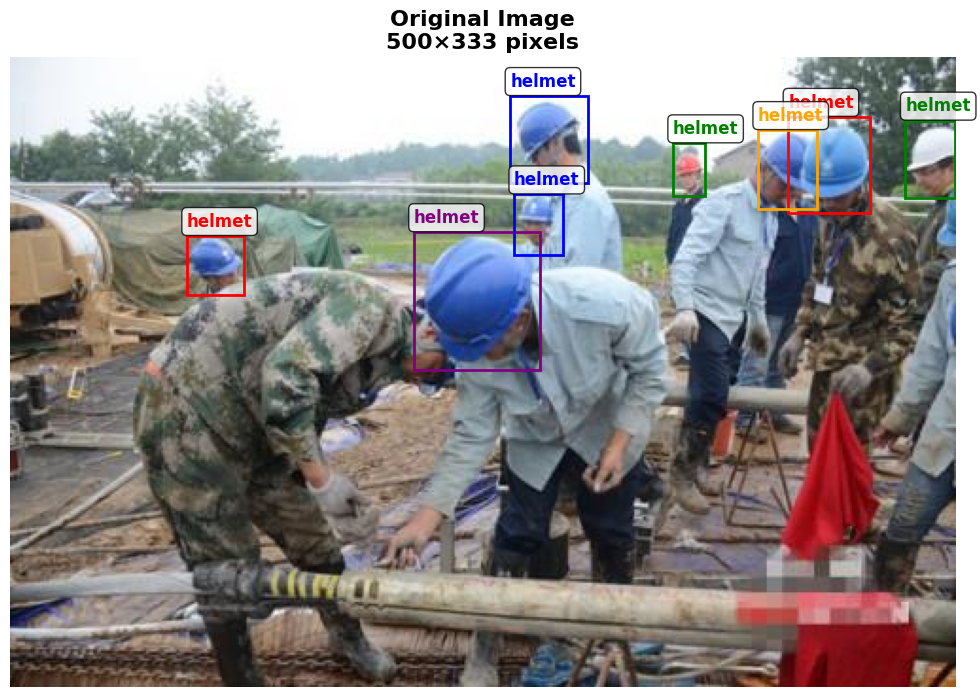


STRETCH METHOD:


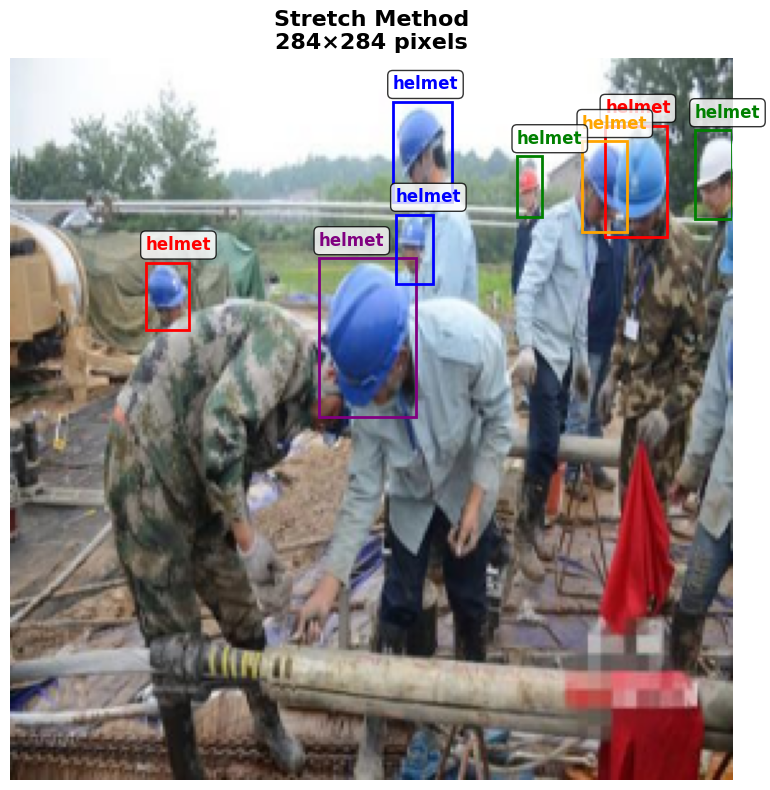


LETTERBOX METHOD:


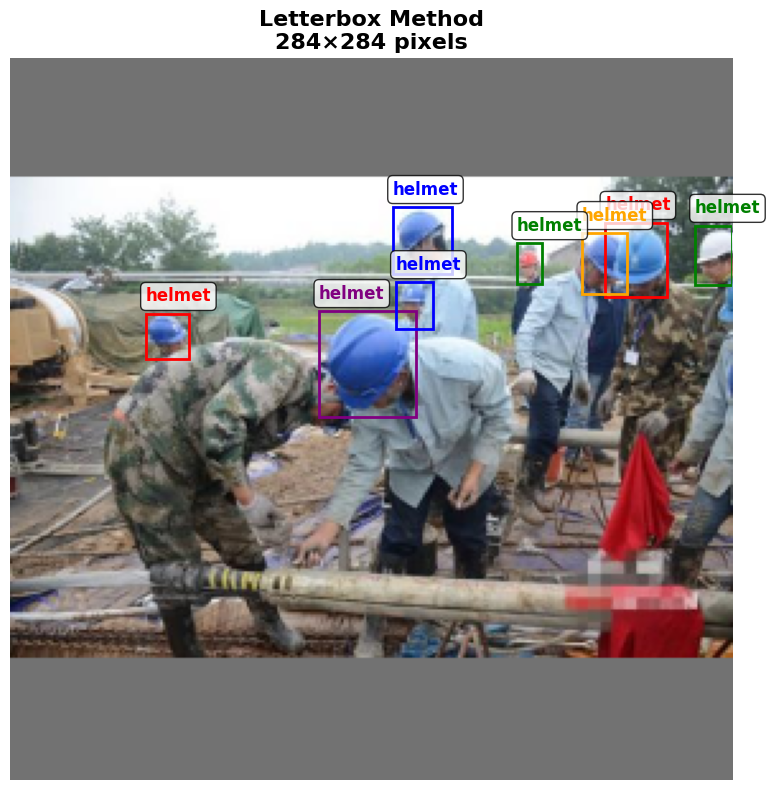

In [ ]:
def show_image_with_boxes(img, objects, title):
    # Convert BGR to RGB for matplotlib
    if len(img.shape) == 3:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img_rgb = img
    
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    
    # Draw bounding boxes
    ax = plt.gca()
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    
    for i, obj in enumerate(objects):
        x1, y1, x2, y2 = obj['bounding_box']
        color = colors[i % len(colors)]
        
        # Draw rectangle
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, 
                               linewidth=2, edgecolor=color, facecolor='none')
        ax.add_patch(rect)
        
        # Add label
        plt.text(x1, y1-5, obj['class_name'], color=color, fontsize=12, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
    
    plt.title(title, fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show original
print("ORIGINAL IMAGE:")
show_image_with_boxes(img, objects, f"Original Image{img.shape[1]}×{img.shape[0]} pixels")

# Show stretch
print("STRETCH METHOD:")
show_image_with_boxes(stretched_img, stretched_objects, f"Stretch Method\n{stretched_img.shape[1]}×{stretched_img.shape[0]} pixels")

# Show letterbox
print("LETTERBOX METHOD:")
show_image_with_boxes(letterboxed_img, letterboxed_objects, f"Letterbox Method\n{letterboxed_img.shape[1]}×{letterboxed_img.shape[0]} pixels")

# 4. Side-by-side comparison


 SIDE-BY-SIDE COMPARISON:
README image saved!


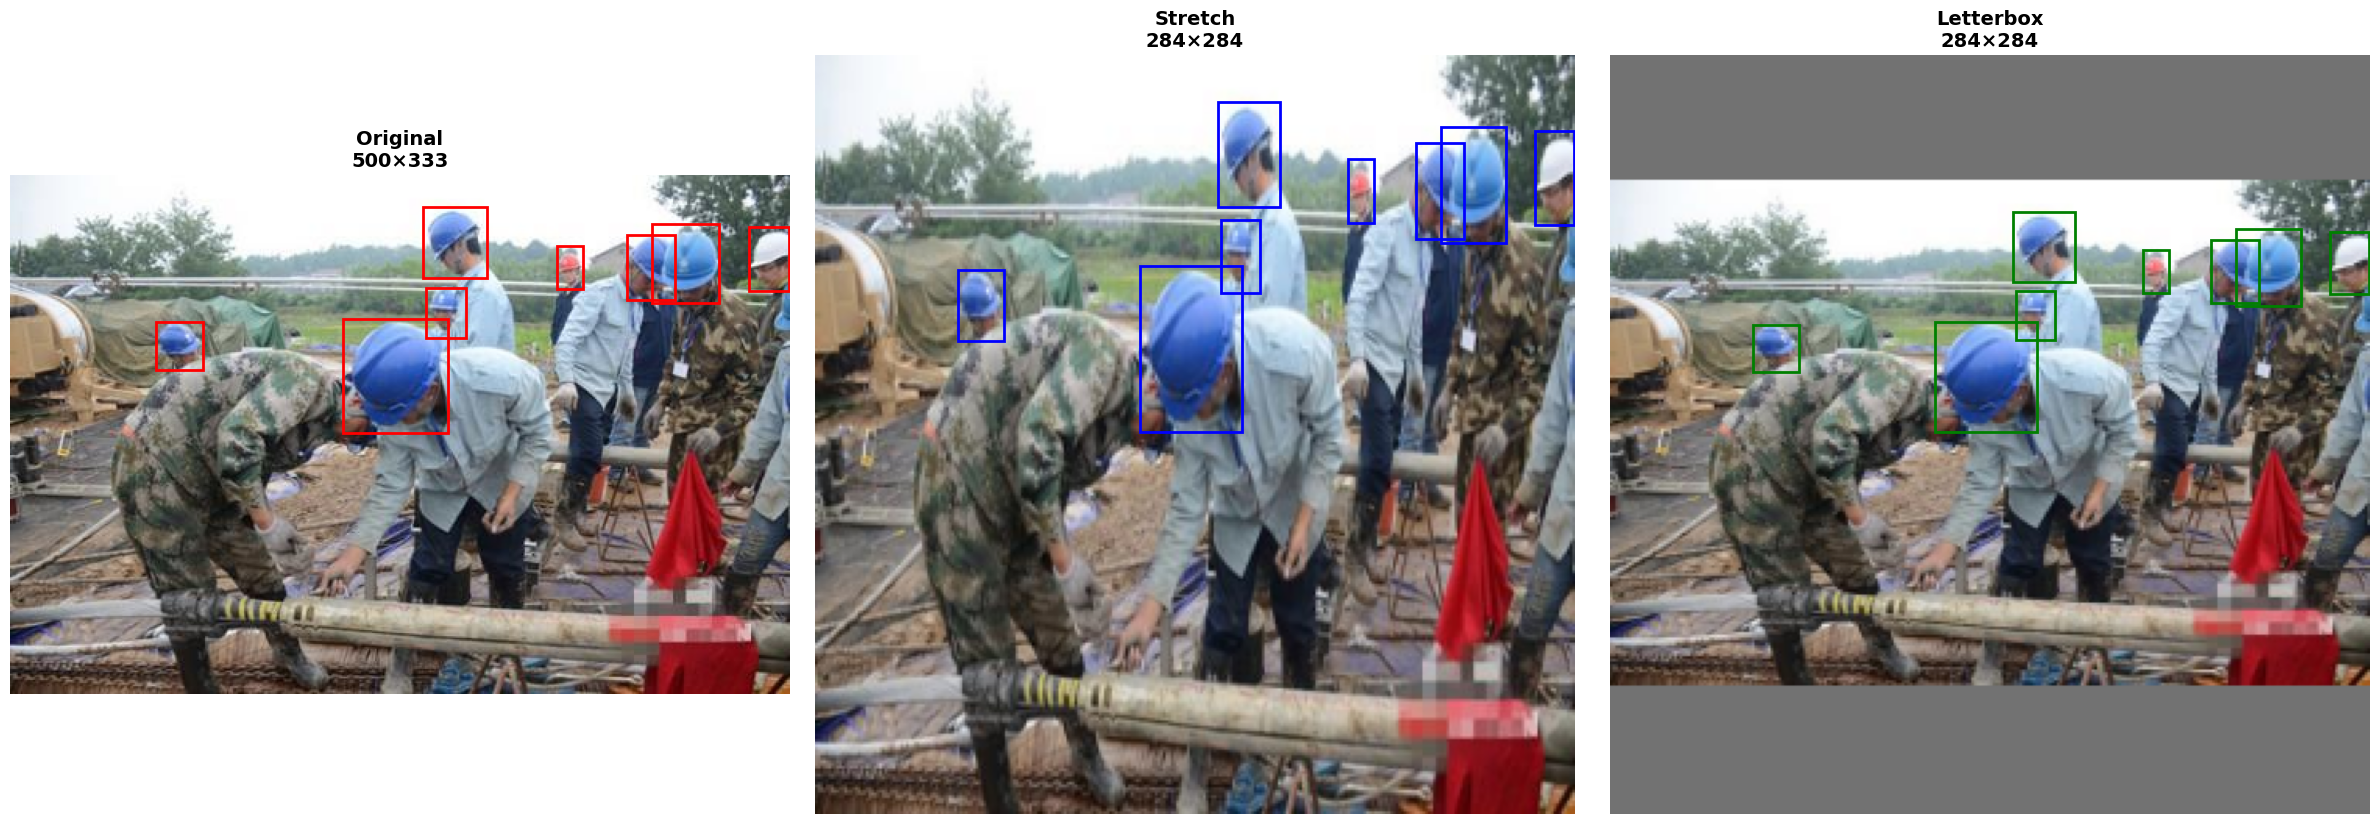

In [ ]:
print("SIDE-BY-SIDE COMPARISON:")

fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Original
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
axes[0].imshow(img_rgb)
for obj in objects:
    x1, y1, x2, y2 = obj['bounding_box']
    rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, 
                           linewidth=2, edgecolor='red', facecolor='none')
    axes[0].add_patch(rect)
axes[0].set_title(f"Original\n{img.shape[1]}×{img.shape[0]}", fontsize=14, fontweight='bold')
axes[0].axis('off')

# Stretch
stretched_rgb = cv2.cvtColor(stretched_img, cv2.COLOR_BGR2RGB)
axes[1].imshow(stretched_rgb)
for obj in stretched_objects:
    x1, y1, x2, y2 = obj['bounding_box']
    rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, 
                           linewidth=2, edgecolor='blue', facecolor='none')
    axes[1].add_patch(rect)
axes[1].set_title(f"Stretch\n{stretched_img.shape[1]}×{stretched_img.shape[0]}", fontsize=14, fontweight='bold')
axes[1].axis('off')

# Letterbox
letterboxed_rgb = cv2.cvtColor(letterboxed_img, cv2.COLOR_BGR2RGB)
axes[2].imshow(letterboxed_rgb)
for obj in letterboxed_objects:
    x1, y1, x2, y2 = obj['bounding_box']
    rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, 
                           linewidth=2, edgecolor='green', facecolor='none')
    axes[2].add_patch(rect)
axes[2].set_title(f"Letterbox\n{letterboxed_img.shape[1]}×{letterboxed_img.shape[0]}", fontsize=14, fontweight='bold')
axes[2].axis('off')

plt.tight_layout()

Path("assets").mkdir(exist_ok=True)
plt.savefig('assets/stretch_vs_letterbox_comparison.png', dpi=150, bbox_inches='tight')
print("README image saved!")

plt.show()